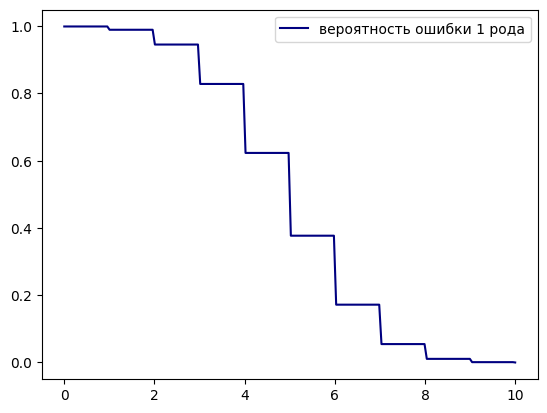

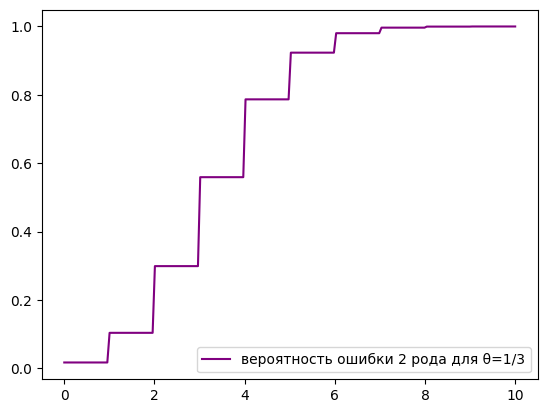

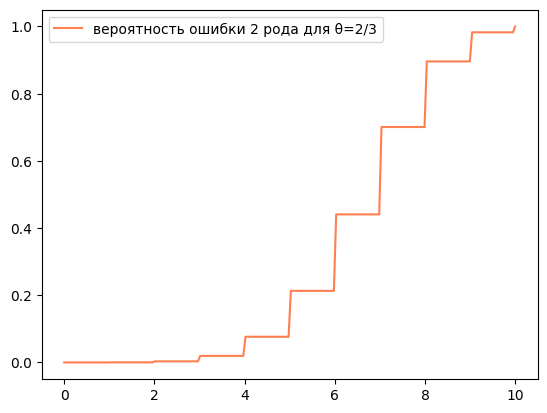

In [2]:
#Задача 1
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

C=np.linspace(0, 10, 200)


a=0.5
plt.plot(C, 1 - stats.binom.cdf(C, p=a, n=10), label='вероятность ошибки 1 рода', color='navy')
plt.legend()
plt.show()

a=1/3
plt.plot(C, stats.binom.cdf(C, p=a, n=10), label='вероятность ошибки 2 рода для θ=1/3', color='purple')
plt.legend()
plt.show()

a=2/3
plt.plot(C, stats.binom.cdf(C, p=a, n=10), label='вероятность ошибки 2 рода для θ=2/3', color='coral')
plt.legend()
plt.show()

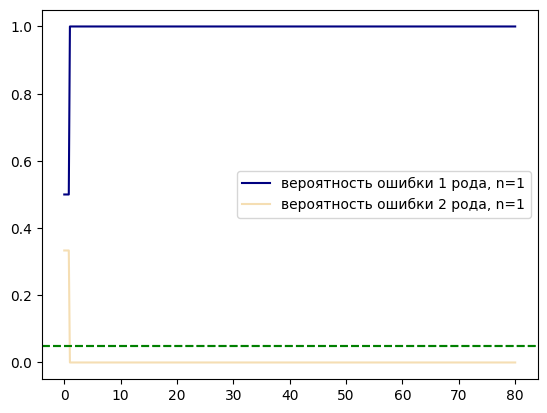

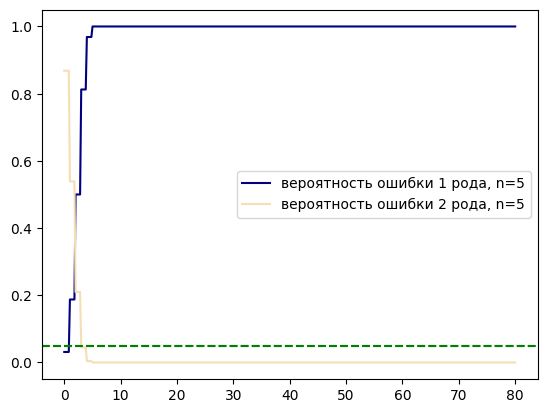

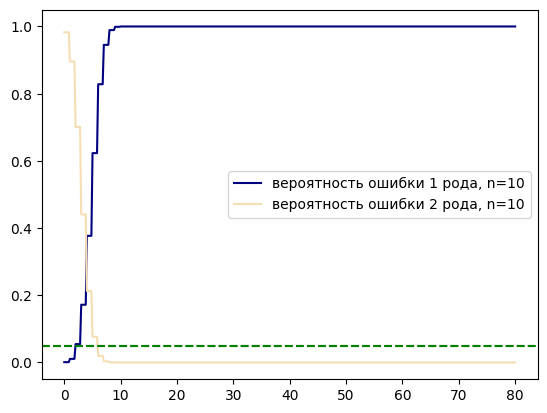

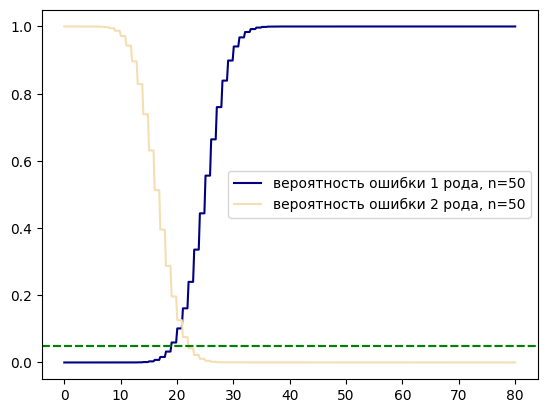

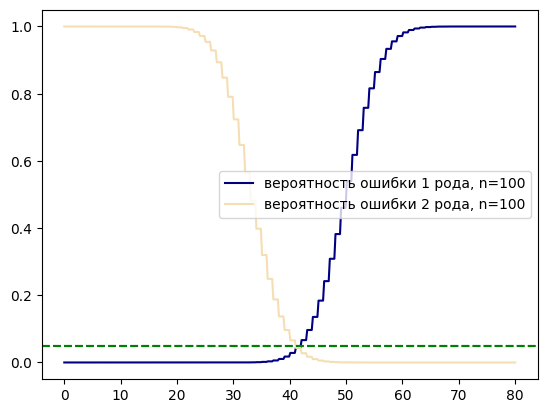

In [3]:
#Задача 3
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

for n in [1, 5, 10, 50, 100]:
  C=np.linspace(0, 80, 400)

  a=0.5
  plt.plot(C, stats.binom.cdf(C, p=a, n=n), label=f'вероятность ошибки 1 рода, n={n}', color='navy')
  plt.axhline(y=0.05, color='g', linestyle='--')

  a=1/3
  plt.plot(C, 1 - stats.binom.cdf(C, p=a, n=n), label=f'вероятность ошибки 2 рода, n={n}', color='wheat')
  plt.axhline(y=0.05, color='g', linestyle='--')

  plt.legend()
  plt.show()

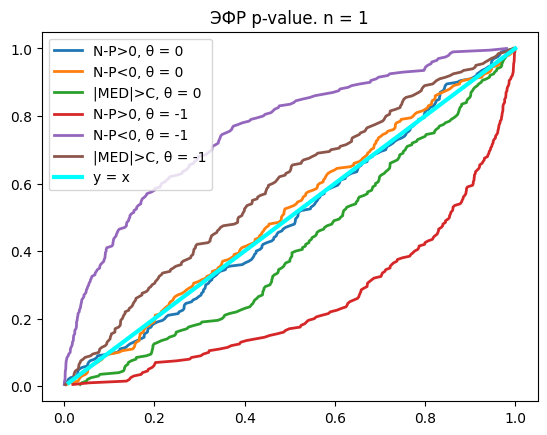

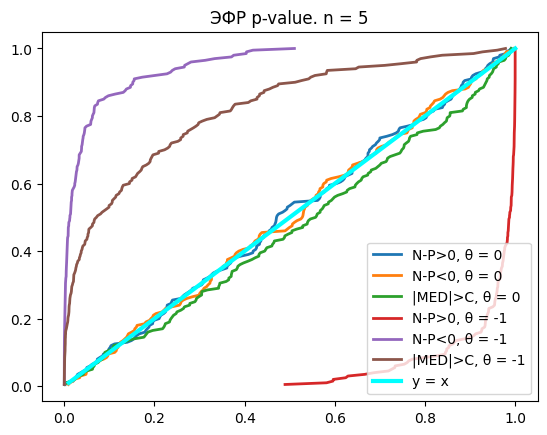

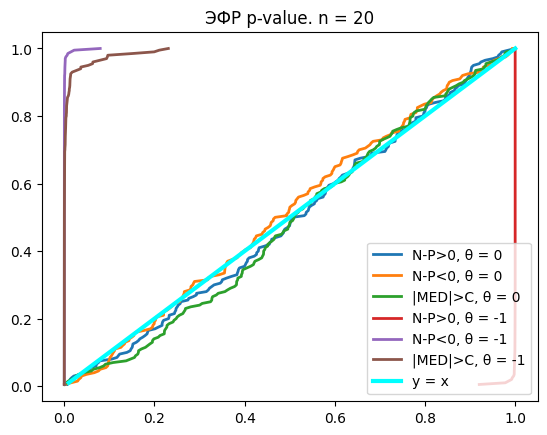

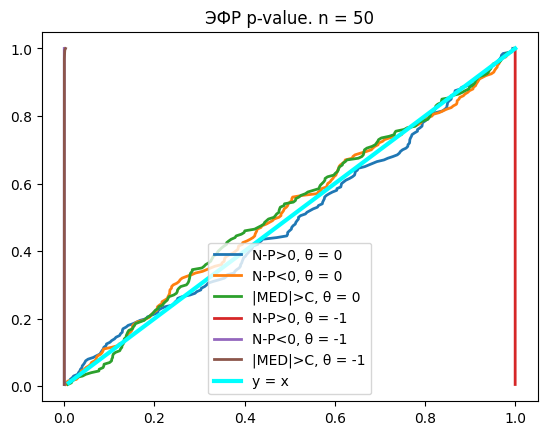

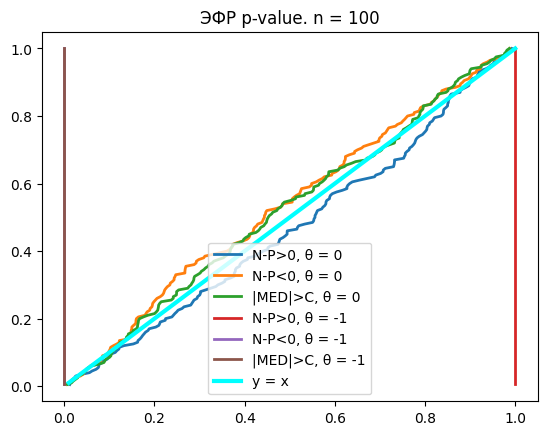

In [10]:
## Задание 2
N = [1,5,20,50,100]
def task(n:int, theta:float):
    def p_value_right(c:float):
        res = 1 - (stats.norm.cdf(c, loc = 0, scale = np.sqrt(n)))
        return res
    def p_value_left(c:float):
        res = (stats.norm.cdf(c, loc = 0, scale = np.sqrt(n)))
        return res
    def p_value_median(c:float):
        x0 = stats.norm.ppf(0.5, loc = 0, scale =1)
        sigma = 1/(2 * stats.norm.pdf(x0, loc =0, scale =1))
        res = 2 - 2 *stats.norm.cdf(np.sqrt(n) * c, loc = 0, scale = sigma)
        return res
    m = 200
    result1 = []
    result2 = []
    result3 = []
    for j in range (m):
        Sample = stats.norm.rvs(theta,1, size=n)
        sample_val = np.sum(Sample)
        med_val = np.absolute(np.median(Sample))

        result1 = np.append(result1, p_value_right(sample_val))
        result2 = np.append(result2, p_value_left(sample_val))
        result3 = np.append(result3, p_value_median(med_val))


    result1 = np.sort(result1)
    result2 = np.sort(result2)
    result3 = np.sort(result3)
    y_vals = [(i+1)/m for i in range(m)]
    plt.title(f"ЭФР p-value. n = {n}")
    ax.plot(result1, y_vals, label = f"N-P>0, θ = {theta}", lw = 2)
    ax.plot(result2, y_vals, label = f"N-P<0, θ = {theta}", lw = 2)
    ax.plot(result3, y_vals, label = f"|MED|>C, θ = {theta}", lw = 2)

y_vals = [(i+1)/100 for i in range(100)]

for n in N:
    fig,ax = plt.subplots()
    for theta in [0,-1]:
        task(n,theta)
    ax.plot(y_vals, y_vals, label = "y = x", lw = 3, color = 'cyan')
    plt.legend()